# Recurrent Neural Networks


## Autoregressive Model

In [1]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show>

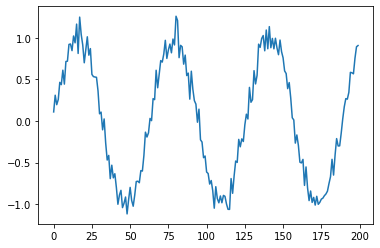

In [3]:
#makes the original 
series = np.sin(0.1*np.arange(200)) + np.random.randn(200)*0.1
plt.plot(series)
plt.show

In [4]:
#Build dataset
T = 10
X =[]
Y =[]
for t in range(len(series)-T):
  x = series[t:T+t]
  X.append(x)
  y = series[T+t]
  Y.append(y)

X = np.array(X).reshape(-1, T)
Y = np.array(Y)
N = len(X)
print(X, Y)

[[ 0.10912096  0.30983552  0.19609558 ...  0.44342643  0.71554791
   0.71926601]
 [ 0.30983552  0.19609558  0.25800057 ...  0.71554791  0.71926601
   0.92074681]
 [ 0.19609558  0.25800057  0.46475031 ...  0.71926601  0.92074681
   0.92626994]
 ...
 [-0.29890779 -0.14683639  0.0257601  ...  0.58491155  0.57994264
   0.56717322]
 [-0.14683639  0.0257601   0.17056833 ...  0.57994264  0.56717322
   0.7547582 ]
 [ 0.0257601   0.17056833  0.26874669 ...  0.56717322  0.7547582
   0.89259897]] [ 0.92074681  0.92626994  0.84609918  1.0221659   0.93989659  1.16511702
  0.81226835  1.24931484  1.04055564  0.91543096  0.70014524  0.85823293
  1.01254129  0.79139425  0.87058749  0.56017039  0.53361091  0.52880511
  0.52542379  0.36254067  0.08681621  0.10654375 -0.10605328  0.02461742
 -0.26357384 -0.46944399 -0.4140761  -0.69284841 -0.53177046 -0.68377765
 -0.63431662 -0.79989822 -1.00155416 -0.89086838 -0.83411625 -1.04164979
 -0.98930484 -0.91449226 -1.11761324 -0.94591755 -0.79871856 -0.9558961

In [5]:
i = Input(shape=(T,))
x = Dense(1)(i)
model = Model(i,x)
model.compile(loss ='mse',optimizer=Adam(lr =0.1))

results = model.fit(X[:N//2], Y[:N//2], epochs = 80, validation_data=(X[-N//2:], Y[-N//2:]),)

Epoch 1/80
3/3 [==============================] - 0s 50ms/step - loss: 1.0965 - val_loss: 0.2675
Epoch 2/80
3/3 [==============================] - 0s 12ms/step - loss: 0.5670 - val_loss: 0.5572
Epoch 3/80
3/3 [==============================] - 0s 12ms/step - loss: 0.3482 - val_loss: 0.1351
Epoch 4/80
3/3 [==============================] - 0s 12ms/step - loss: 0.2001 - val_loss: 0.2141
Epoch 5/80
3/3 [==============================] - 0s 12ms/step - loss: 0.2710 - val_loss: 0.0837
Epoch 6/80
3/3 [==============================] - 0s 12ms/step - loss: 0.0731 - val_loss: 0.0572
Epoch 7/80
3/3 [==============================] - 0s 12ms/step - loss: 0.1059 - val_loss: 0.0963
Epoch 8/80
3/3 [==============================] - 0s 13ms/step - loss: 0.1001 - val_loss: 0.0411
Epoch 9/80
3/3 [==============================] - 0s 14ms/step - loss: 0.0499 - val_loss: 0.0932
Epoch 10/80
3/3 [==============================] - 0s 12ms/step - loss: 0.0901 - val_loss: 0.0784
Epoch 11/80
3/3 [============

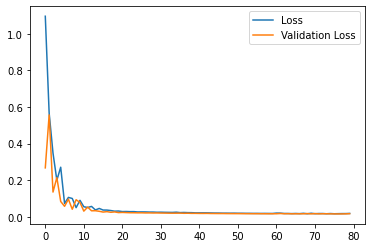

In [6]:
plt.plot(results.history['loss'], label='Loss')
plt.plot(results.history['val_loss'], label='Validation Loss')
plt.legend()

In [7]:
#Wrong Forecast
validation_target = Y[-N//2:]
validation_predictions =[]
i = -N//2
while len(validation_predictions) < len(validation_target):
  p = model.predict(X[i].reshape(1, -1))[0,0]
  i +=1
  validation_predictions.append(p)

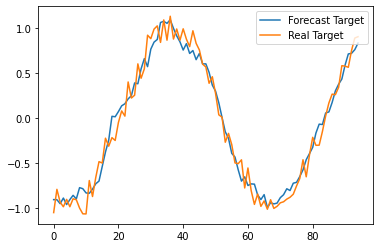

In [8]:
plt.plot(validation_predictions, label = 'Forecast Target')
plt.plot(validation_target, label = 'Real Target')
plt.legend( )

In [9]:
#Forecast using Predictions of previous data to multiple time steps
validation_predictions_2 = []
last_x = X[-N//2]
while len(validation_predictions_2) < len(validation_target):
  p = model.predict(last_x.reshape(1, -1))[0,0]
  print(last_x)
  print(p)
  validation_predictions_2.append(p)
  print(validation_predictions_2)
  last_x = np.roll(last_x, -1)
  last_x[-1]=p
  print(last_x)


[ 0.1422266  -0.22634394 -0.25341445 -0.44112294 -0.42148516 -0.61368197
 -0.63170313 -0.75858869 -0.71593578 -0.83794288]
-0.90446204
[-0.90446204]
[-0.22634394 -0.25341445 -0.44112294 -0.42148516 -0.61368197 -0.63170313
 -0.75858869 -0.71593578 -0.83794288 -0.90446204]
[-0.22634394 -0.25341445 -0.44112294 -0.42148516 -0.61368197 -0.63170313
 -0.75858869 -0.71593578 -0.83794288 -0.90446204]
-0.8725183
[-0.90446204, -0.8725183]
[-0.25341445 -0.44112294 -0.42148516 -0.61368197 -0.63170313 -0.75858869
 -0.71593578 -0.83794288 -0.90446204 -0.8725183 ]
[-0.25341445 -0.44112294 -0.42148516 -0.61368197 -0.63170313 -0.75858869
 -0.71593578 -0.83794288 -0.90446204 -0.8725183 ]
-0.91951066
[-0.90446204, -0.8725183, -0.91951066]
[-0.44112294 -0.42148516 -0.61368197 -0.63170313 -0.75858869 -0.71593578
 -0.83794288 -0.90446204 -0.8725183  -0.91951066]
[-0.44112294 -0.42148516 -0.61368197 -0.63170313 -0.75858869 -0.71593578
 -0.83794288 -0.90446204 -0.8725183  -0.91951066]
-0.88176984
[-0.90446204,

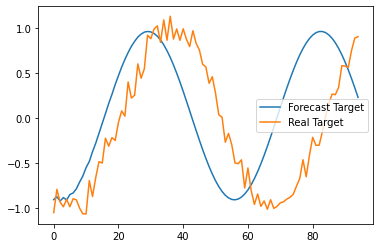

In [10]:
plt.plot(validation_predictions_2, label = 'Forecast Target')
plt.plot(validation_target, label = 'Real Target')
plt.legend( )

## RNN Example Code


<function matplotlib.pyplot.show>

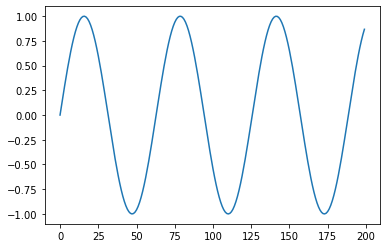

In [24]:
#load data
series_rnn = np.sin(0.1*np.arange(200)) #+ np.random.randn(200)*0.15 + np.random.randn(200)*0.12
plt.plot(series_rnn)
plt.show

In [32]:
T = 10
D = 1
X_r = []
Y_r = []
for t in range(len(series_rnn)-T):
  x = series_rnn[t:t+T]
  X_r.append(x)
  y = series_rnn[t+T]
  Y_r.append(y)

X_r = np.array(X_r).reshape(-1, T, 1)
Y_r = np.array(Y_r)
N = len(X_r)
print(N)
print(X_r.shape, Y_r.shape)

190
(190, 10, 1) (190,)


In [30]:
#build model
from tensorflow.keras.layers import SimpleRNN
i_r = Input(shape=(T, 1))
x_r = SimpleRNN(5)(i_r)
x_r = Dense(1)(x_r)
model_rnn = Model(i_r, x_r) 
model_rnn.compile(
    loss='mse',
    optimizer=Adam(lr=0.1)
)

In [31]:
#train model
rr = model_rnn.fit(
    X_r[:-N//2], Y_r[:-N//2], 
    epochs = 80, 
    validation_data=(X_r[-N//2:], Y_r[-N//2:]),
)

Epoch 1/80
3/3 [==============================] - 0s 54ms/step - loss: 0.1017 - val_loss: 0.0319
Epoch 2/80
3/3 [==============================] - 0s 15ms/step - loss: 0.0403 - val_loss: 0.0128
Epoch 3/80
3/3 [==============================] - 0s 15ms/step - loss: 0.0172 - val_loss: 0.0586
Epoch 4/80
3/3 [==============================] - 0s 14ms/step - loss: 0.0239 - val_loss: 0.0036
Epoch 5/80
3/3 [==============================] - 0s 15ms/step - loss: 0.0143 - val_loss: 0.0181
Epoch 6/80
3/3 [==============================] - 0s 14ms/step - loss: 0.0097 - val_loss: 0.0085
Epoch 7/80
3/3 [==============================] - 0s 14ms/step - loss: 0.0092 - val_loss: 0.0090
Epoch 8/80
3/3 [==============================] - 0s 16ms/step - loss: 0.0034 - val_loss: 0.0036
Epoch 9/80
3/3 [==============================] - 0s 15ms/step - loss: 0.0047 - val_loss: 0.0044
Epoch 10/80
3/3 [==============================] - 0s 16ms/step - loss: 0.0021 - val_loss: 0.0032
Epoch 11/80
3/3 [============

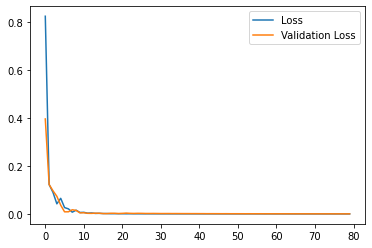

In [15]:
#evaluate model
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Validation Loss')
plt.legend()

In [16]:
#make predictions
validation_target_r = Y_r[-N//2:]
validation_predictions_1 =[]
i = -N//2
while len(validation_predictions_1) < len(validation_target_r):
  p = model_rnn.predict(X_r[i].reshape(1, -1, 1))[0,0]
  i +=1
  validation_predictions_1.append(p)

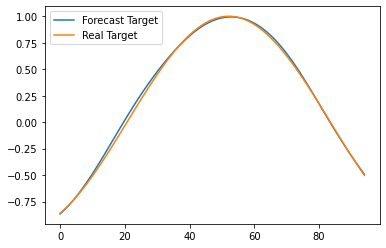

In [17]:
plt.plot(validation_predictions_1, label = 'Forecast Target')
plt.plot(validation_target_r, label = 'Real Target')
plt.legend()

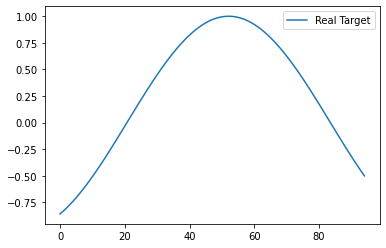

In [18]:
plt.plot(validation_target_r, label = 'Real Target')
plt.legend()

In [19]:
#Forecast using Predictions of previous data to multiple time steps
validation_target_2_r = Y_r[-N//2:]
validation_predictions_2_r = []
last_x_2 = X_r[-N//2]

while len(validation_predictions_2_r) < len(validation_target_2_r):
  p_2 = model_rnn.predict(last_x_2.reshape(1, -1, 1))[0,0]
  validation_predictions_2_r.append(p_2)
  last_x_2 = np.roll(last_x_2, -1)
  last_x_2[-1] = p_2

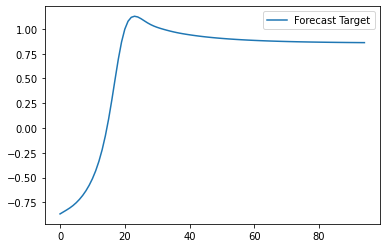

In [20]:
plt.plot(validation_predictions_2_r, label = 'Forecast Target')
plt.legend()

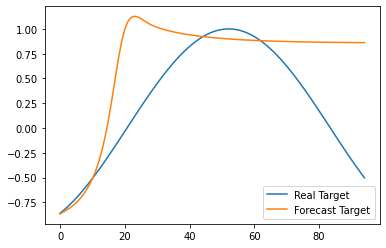

In [21]:
plt.plot(validation_target_2_r, label = 'Real Target')
plt.plot(validation_predictions_2_r, label = 'Forecast Target')
plt.legend()